In [1]:
# !pip install causal-impact

In [2]:
%run ../src/causal_impact.py

In [3]:
# from causal_impact.causal_impact import CausalImpact

In [4]:
import pandas as pd
import pickle
import numpy as np
import scipy.stats as stats

import math
import datetime
import matplotlib.dates as mdates

from re import sub
from decimal import Decimal
import re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [5]:
avg_price = pd.read_csv('../data/comp_price.csv')

In [6]:
avg_price = avg_price.drop('date.1', axis = 1 )

avg_price_t = avg_price.set_index('date')
avg_price_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 2015-05-03 to 2019-06-30
Data columns (total 2 columns):
Portland_avg_price    216 non-null float64
SF_avg_price          213 non-null float64
dtypes: float64(2)
memory usage: 5.1+ KB


In [7]:
# avg_price_t

In [8]:
avg_price2 = avg_price.drop('date', axis =1)

In [9]:
for idx, dt in enumerate(list(avg_price_t.index)):
    print(idx, dt)

0 2015-05-03
1 2015-05-10
2 2015-05-17
3 2015-05-24
4 2015-05-31
5 2015-06-07
6 2015-06-14
7 2015-06-21
8 2015-06-28
9 2015-07-05
10 2015-07-12
11 2015-07-19
12 2015-07-26
13 2015-08-02
14 2015-08-09
15 2015-08-16
16 2015-08-23
17 2015-08-30
18 2015-09-06
19 2015-09-13
20 2015-09-20
21 2015-09-27
22 2015-10-04
23 2015-10-11
24 2015-10-18
25 2015-10-25
26 2015-11-01
27 2015-11-08
28 2015-11-15
29 2015-11-22
30 2015-11-29
31 2015-12-06
32 2015-12-13
33 2015-12-20
34 2015-12-27
35 2016-01-03
36 2016-01-10
37 2016-01-17
38 2016-01-24
39 2016-01-31
40 2016-02-07
41 2016-02-14
42 2016-02-21
43 2016-02-28
44 2016-03-06
45 2016-03-13
46 2016-03-20
47 2016-03-27
48 2016-04-03
49 2016-04-10
50 2016-04-17
51 2016-04-24
52 2016-05-01
53 2016-05-08
54 2016-05-15
55 2016-05-22
56 2016-05-29
57 2016-06-05
58 2016-06-12
59 2016-06-19
60 2016-06-26
61 2016-07-03
62 2016-07-10
63 2016-07-17
64 2016-07-24
65 2016-07-31
66 2016-08-07
67 2016-08-14
68 2016-08-21
69 2016-08-28
70 2016-09-04
71 2016-09-11
72

In [10]:
avg_price2.columns = ["x1","y"]
avg_price2 = avg_price2[['y', 'x1']]

# impute missing values in the control market.

avg_price2['x1'] = avg_price2['x1'].fillna(method = 'ffill')

# only a few missing data points of SF prices in the pre-period

avg_price2['y'] = avg_price2['y'].fillna(method = 'ffill')
avg_price2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
y     217 non-null float64
x1    218 non-null float64
dtypes: float64(2)
memory usage: 3.5 KB


In [11]:
avg_price2 = avg_price2[1:]

In [12]:
avg_price2.to_csv("../data/price_series_for_R_imputed.csv")

In [13]:
# avg_price2

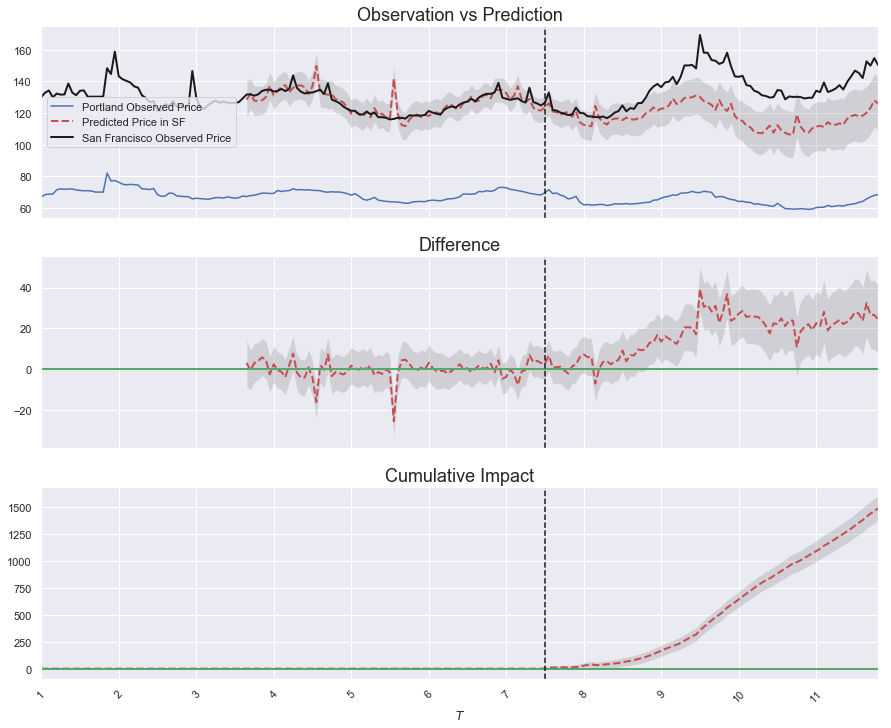

In [14]:
# Set intervention date as the week of Nov 5, 2017

date_inter = 131

ci = CausalImpact(avg_price2, date_inter, n_seasons= 52)
ci.run(max_iter=50000)
ci.plot()

In [22]:
# ci.summary


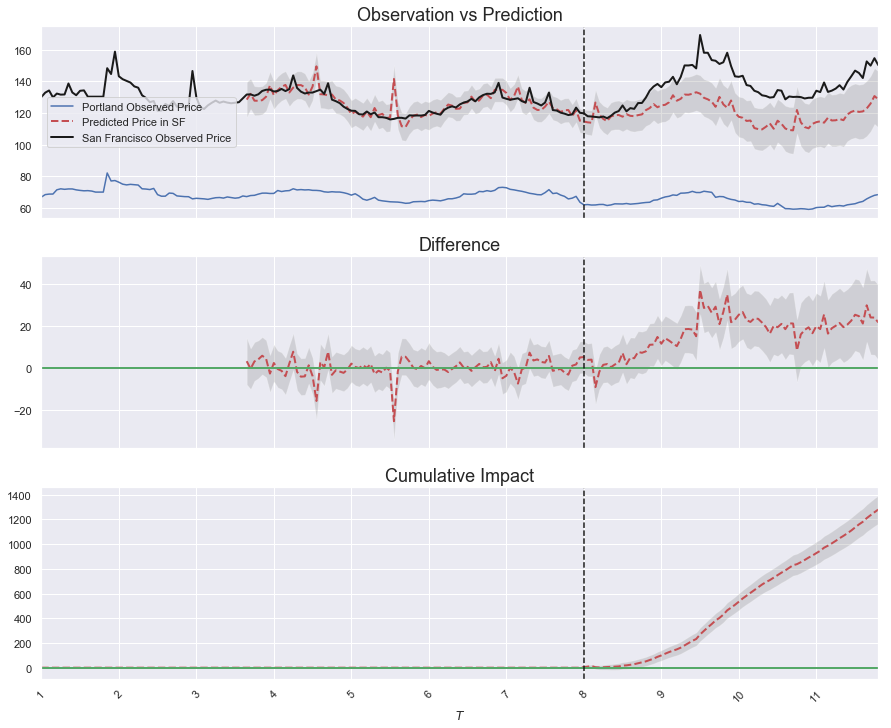

In [20]:
# set the intervention date as the week of Jan 14, 2018

date_inter = 141

ci2 = CausalImpact(avg_price2, date_inter, n_seasons= 52)
ci2.run(max_iter=50000)
ci2.plot()

In [17]:
# ci2.summary()

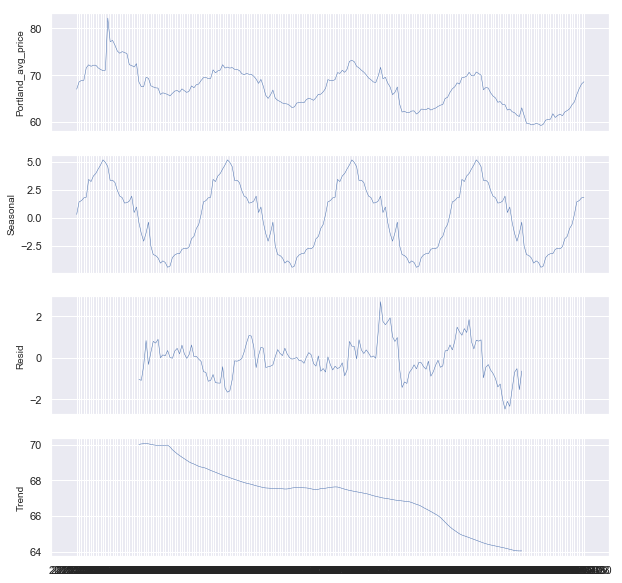

In [18]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(avg_price_t.dropna()['Portland_avg_price'].values, model='additive', freq= 52)  
price_decomp = avg_price_t.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['Portland_avg_price','seasonal','resid','trend']

for i, ax in enumerate(axs):
#     ax.set_title('Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)

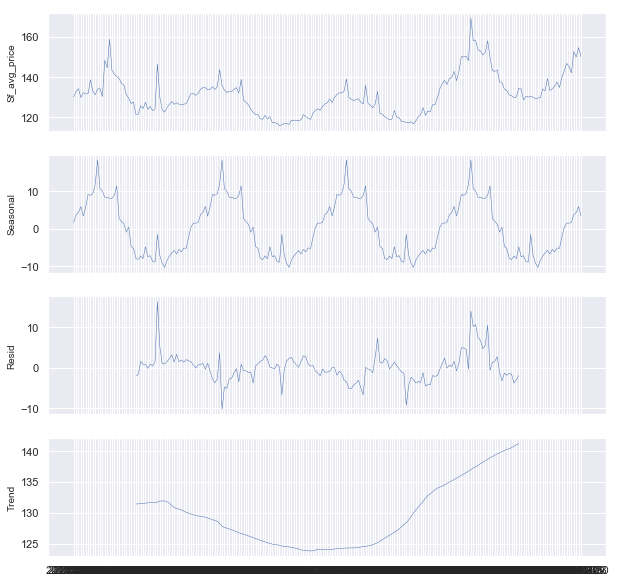

In [19]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(avg_price_t.dropna()['SF_avg_price'].values, model='additive', freq= 52)  
price_decomp = avg_price_t.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['SF_avg_price','seasonal','resid','trend']

for i, ax in enumerate(axs):
#     ax.set_title('Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)
# ax.vline(x= datetime.date(2018,1,16), color = 'red', linestyle='--',label='SF Regulation Compliance Deadline')